In [135]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [136]:
# get titanic & test csv files as a DataFrame
# titanic_df is the training data set 

titanic_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# preview the data
titanic_df.head()#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
#print info about the DataFrames
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [138]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df = test_df.drop(['PassengerId','Name','Ticket'], axis=1)
"""axis= 1 tells us that we are dropping columns here, not rows"""

'axis= 1 tells us that we are dropping columns here, not rows'

In [121]:
#Find out if there are any missing values
# False means it has a value in it, and True means it is empty 
titanic_df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,True,False


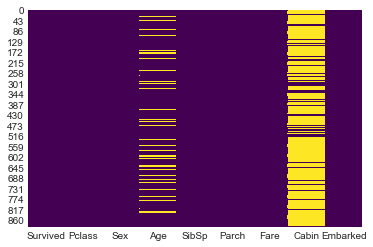

In [139]:
# This is hard to look at, so make a heatmap to visualize empty columns. 
sns.heatmap(titanic_df.isnull(),cbar=False,cmap='viridis')

# (cbar is the legend - not needed in this case)
# (viridis is a color scheme)

In [140]:
# Cabin

"""Looking at this, it seems like there are too many missing values in cabin for it to have
an impact on prediction. Drop this column """

titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

# Age - maybe enough info to fill in the empty values 

## Now, let's investigate the other factors to see if they have interesting patterns. 

Our factors (columns) are: 
- Passenger Class
- Fare
- Age
- Sex
- Family members present 
- Place embarked


# Passenger Class

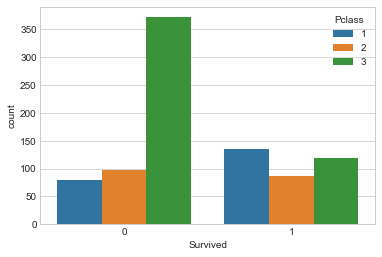

In [141]:
# Graph the number of passengers who survived, split by class
sns.countplot(x='Survived',hue='Pclass',data=titanic_df)

It looks like the majority of people who did not survive (0 on the x axis) were in the third class. 
This seems like a striking observation, so I will leave this variable in for the prediction algorithms.

# Fare

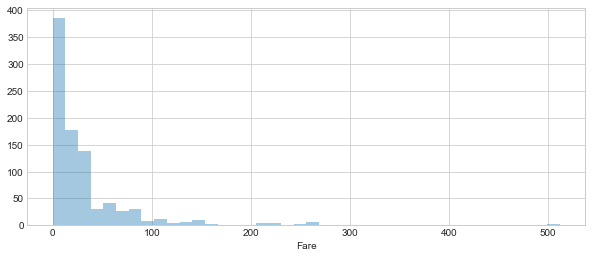

In [142]:
#Plot distribution of fares 
plt.figure(figsize=(10,4))
sns.distplot(titanic_df['Fare'],kde=False,bins=40)

#Expanded the figure size to see the distribution more clearly

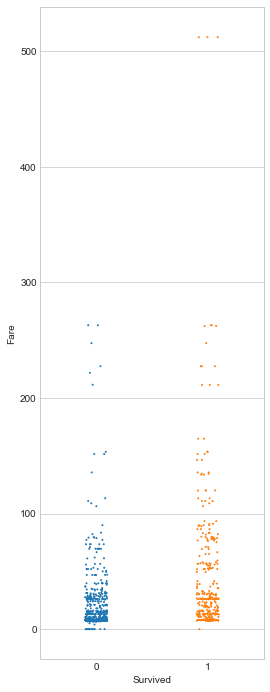

In [143]:
plt.figure(figsize=(4,12))
sns.stripplot(x='Survived',y='Fare',data=titanic_df,jitter=True,size=2)

The above graph demonstrates that fare is not a great predictor of survival, but may have a slight effect. 

For those who paid between 200-300, approximately the same number of people survived as did not surive. 

Between 100-200: more people survived
Between 0-100: It is hard to say, but it looks like more people did not survive. The cluster closer to 100 seems to have a higher survival rate.

I will leave this variable in. 

# Age

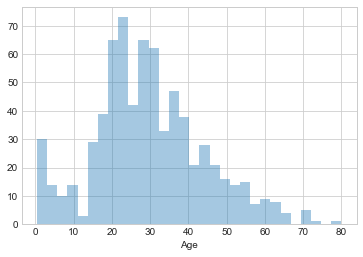

In [144]:
# First, plot distribution of ages
sns.distplot(titanic_df['Age'].dropna(),kde=False, bins=30)
# Drop Nan values to graph

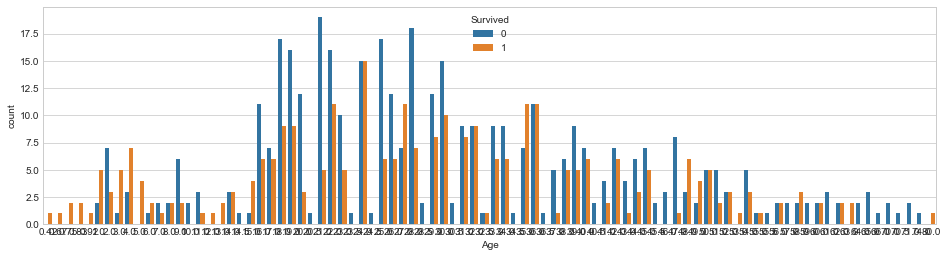

In [145]:
# How does Age correlate with Survival?
plt.figure(figsize=(16,4))
sns.countplot(x='Age',data=titanic_df,hue='Survived')

Not a super clear pattern, but some differences in survival outcome based on age:
- more children under the age of 8 survived than did not
- more passengers between age 16-30 did not survive than did 
- more passengers between age 65-80 did not survive 

I will leave this variable in. 

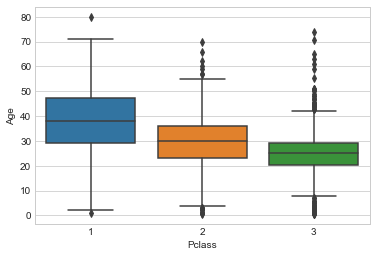

In [165]:
"""What do we do with the missing age values? 
Set to average age overall? Perhaps set them to the average age of the class they're in?"""

#Plot average age of passengers in each class
sns.boxplot(x='Pclass',y='Age',data=titanic_df)

In [147]:
# Calculate the mean ages of passengers in each class
print(titanic_df.groupby('Pclass')['Age'].mean())
print(titanic_df['Age'].mean())

# function to fill in the age of passengers missing this information
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
    else: 
        return Age

# Run the function
# The .apply() method allows me to apply the method to specific columns in the df, specified in the function
# important to include the else - return age command 

titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(input_age,axis=1)

titanic_df.head()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
29.69911764705882


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [148]:
# Run this function on the test set as well to keep it consistent. 
test_df['Age'] = test_df[['Age','Pclass']].apply(input_age,axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


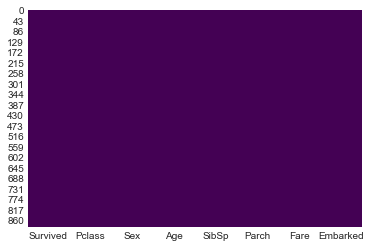

In [149]:
# Run heatmap again to check for missing age entries 
sns.heatmap(titanic_df.isnull(),cbar=False,cmap='viridis')

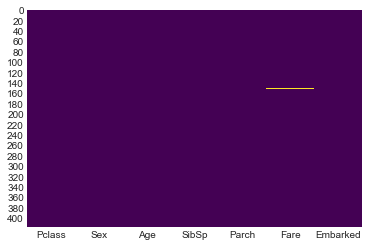

In [150]:
#Check the test dataframe as well
sns.heatmap(test_df.isnull(),cbar=False,cmap='viridis')

In [151]:
# There is an empty cell in fare in the test data. Replace this with the average fare for that class. 
print(test_df['Fare'].mean())
print(test_df.groupby('Pclass')['Fare'].mean())

def input_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 94
        elif Pclass == 2:
            return 22
        elif Pclass == 3:
            return 12
    else: 
        return Fare

test_df['Fare'] = test_df[['Fare','Pclass']].apply(input_fare,axis=1)



35.6271884892086
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


# Family

In [152]:
"""Instead of having two columns Parch & SibSp, we can simplify this to one column - if they have 
# family on board at all. Will any family increase the chance of survival?"""

# Create a new column Family. Add values of Parch and SibSp to this
# This results in a column with the total number of family members on board
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
test_df['Family'] = test_df["Parch"] + test_df["SibSp"]

# Drop the Parch & SibSp columns
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

test_df.head()


,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,1
2,2,male,62.0,9.6875,Q,0
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,2


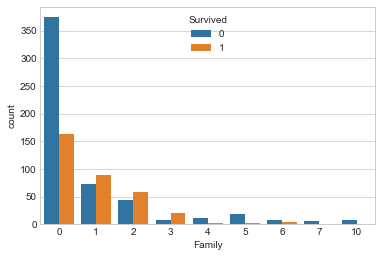

In [153]:
#Graph number of people who survived with and without family 
sns.countplot(x='Family', data=titanic_df, hue='Survived')


The above graph shows:
- many more passengers traveling alone died
- more passengers with 1-3 family members survived than died
- more passengers with 4 or more family members died 

This seems like it may impact survival predictions, so I will leave it in. 

# Sex

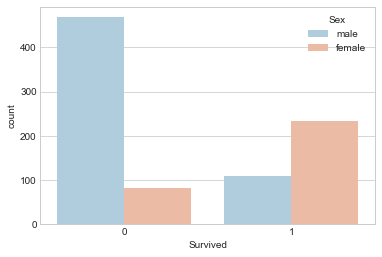

In [154]:
# Plot the number of passengers of each sex, split based on survival
sns.countplot(x='Survived',hue='Sex',data=titanic_df,palette='RdBu_r')

In [155]:
# Use a dummy variable to split the sex column into male and female (0's and 1's) so that it can be used for ML algorithms
sex = pd.get_dummies(titanic_df['Sex'],drop_first=True)
# Avoid multi-linearity (one column perfectly predicts the other - will mess up ML agorithms)

sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [156]:
# add the new sex column to our training dataframe
titanic_df = pd.concat([titanic_df,sex],axis=1)

#Drop the Sex column since it's now duplicated
titanic_df.drop(['Sex'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Age,Fare,Embarked,Family,male
0,0,3,22.0,7.2500,S,1,1
1,1,1,38.0,71.2833,C,1,0
2,1,3,26.0,7.9250,S,0,0
3,1,1,35.0,53.1000,S,1,0
4,0,3,35.0,8.0500,S,0,1


In [157]:
# repeat for the test dataframe
test_df_sex = pd.get_dummies(test_df['Sex'],drop_first=True)
test_df = pd.concat([test_df,test_df_sex],axis=1)
test_df.drop(['Sex'],axis=1,inplace=True)
test_df.head()

,Pclass,Age,Fare,Embarked,Family,male
0,3,34.5,7.8292,Q,0,1
1,3,47.0,7.0000,S,1,0
2,2,62.0,9.6875,Q,0,1
3,3,27.0,8.6625,S,0,1
4,3,22.0,12.2875,S,2,0


Now the only column that contains non-numerical values is the embarked column. Let's look at this and see if we want to change it into numbers using dummy variables, or to remove this column. 

# Embarked - where they boarded the boat from

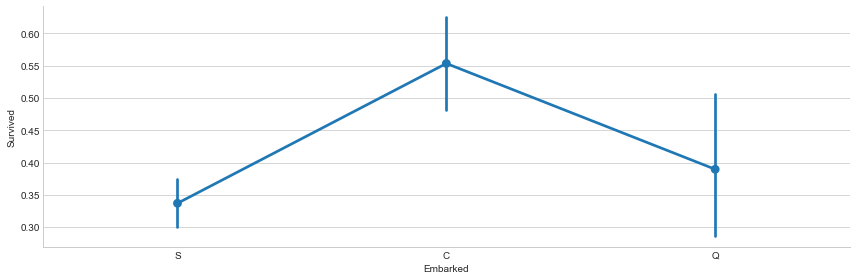

In [158]:
# plot
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)


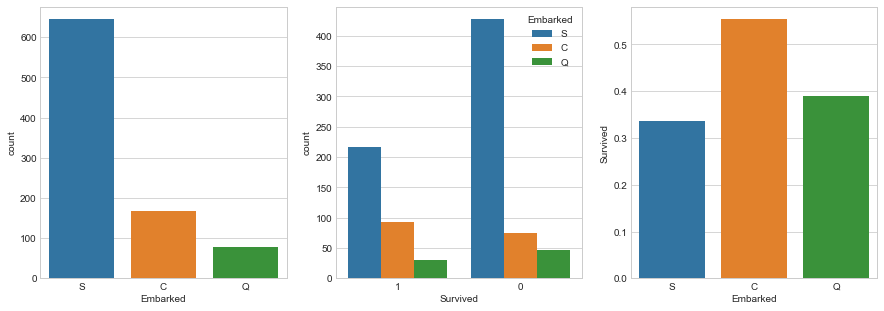

In [159]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)

# could use factorplot as above or the countplot function. 
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

Looking at the data above, we can see: 
- Most people embarked at S (fig 1), with considerably lower numbers from C and Q. 
- Approximately the same # of people survived as didn't in all 3 groups. More people survived from C than the others, but still only a little over half of people from group C survived (compare means between groups in fig 3)

This variable is probably not a main factor in predicting survial outcome, but I can leave it in. 

In [160]:
# Create dummy variables for embarked
embarked = pd.get_dummies(titanic_df['Embarked'],drop_first=True)
embarked.head()

# add the new embarked column to our training dataframe
titanic_df = pd.concat([titanic_df,embarked],axis=1)

#Drop the Embarked column since it's now duplicated
titanic_df.drop(['Embarked'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Age,Fare,Family,male,Q,S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [161]:
# Fix embarked on test set as well
embarked2 = pd.get_dummies(test_df['Embarked'],drop_first=True)
test_df = pd.concat([test_df,embarked2],axis=1)
test_df.drop(['Embarked'],axis=1,inplace=True)
test_df.head()

,Pclass,Age,Fare,Family,male,Q,S
0,3,34.5,7.8292,0,1,1,0
1,3,47.0,7.0000,1,0,0,1
2,2,62.0,9.6875,0,1,1,0
3,3,27.0,8.6625,0,1,0,1
4,3,22.0,12.2875,2,0,0,1


# Now all of our data is numerical and we can apply machine learning algorithms. 

## Since this will be categorical data (0 or 1 - did not survive or survive) I will use logistic regression. 

In [162]:
# Import needed packages
from sklearn.linear_model import LogisticRegression


# define the training and testing sets for the logistic regression method
""" X = all of the variables you want to include in the prediction
    Y = the predicted outcome - does the passenger survive? """

# For X train - we don't want to include the survived column in the prediction, since we will be predicting this column
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test = test_df

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

In [163]:
logreg.score(X_train, Y_train)

0.8080808080808081

# It looks like the logarithmic regression model is 80.8% accurate

## Now let's look at which factors were most highly correlated with correctly predicting survival

In [164]:
# Get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df.sort_values(by='Coefficient Estimate',ascending=True)

,Features,Coefficient Estimate
4,male,-2.490540
0,Pclass,-0.870070
6,S,-0.248785
3,Family,-0.201964
1,Age,-0.029319
5,Q,-0.016750
2,Fare,0.004703


### Conclusions:

-Being male was the strongest factor in predicting survial, more males did not survive 
-Passenger class also played a role in predicting survival 
-Where you embarked, if you had family with you, your age, and your fare did not. 

However, age might not be linearly related to survival, but might be more of a threshold. Ex, children likely to survive more than adults. Including a is child column might improve the model. 

Likewise, family seems to make an impact between 1-3 family members, separating this out may further improve the model.